In [1]:
import matplotlib.pyplot as plt
import pyabf
#import seaborn as sns
from scipy.signal import find_peaks
import numpy as np
filepath = r'\Users\tsaim5\Desktop\10-08-19_VIP-cre_ChEATA_stCROME_P29\t100819bVIP_0001.abf'
abf = pyabf.ABF(filepath)
abf.setSweep(5)
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
print(abf)

ABF (version 2.5.0.0) with 1 channel (mV), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 2.51 minutes, recorded with protocol "Optogenetic stim_ch1_deltaT".


In [3]:
print(abf.headerText) # display header information in the console
abf.headerLaunch()


### ABF Class Methods ###
abf.launchInClampFit()
abf.saveABF1()
abf.setSweep()
abf.sweepD()

### ABF Class Variables ###
abfDateTime = 2019-10-08 18:03:25.807000
abfDateTimeString = 2019-10-08T18:03:25.807
abfFileComment =
abfFilePath = C:\Users\tsaim5\Desktop\10-08-19_VIP-cre_ChEATA_stCROME_P29\t100819bVIP_0001.abf
abfID = t100819bVIP_0001
abfVersion = {'major': 2, 'minor': 5, 'bugfix': 0, 'build': 0}
abfVersionString = 2.5.0.0
adcNames = ['IN 0']
adcUnits = ['mV']
channelCount = 1
channelList = [0]
creatorVersion = {'major': 10, 'minor': 5, 'bugfix': 2, 'build': 6}
creatorVersionString = 10.5.2.6
dacNames = ['Cmd 0']
dacUnits = ['pA']
data = [[-66.7725 -66.7419 -66.7725 ... -69.3054 -69.3359 -69.3054]]
dataByteStart = 7168
dataLengthMin = 2.5083333333333333
dataLengthSec = 150.5
dataPointByteSize = 2
dataPointCount = 150000
dataPointsPerMs = 10
dataRate = 10000
dataSecPerPoint = 0.0001
fileGUID = {6B6644B2-ECC7-4D9F-9F96-F8491C47C0C0}
holdingCommand = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

C:\Users\tsaim5\AppData\Local\Continuum\anaconda3\envs\Ephys\lib\site-packages\pyabf\abfHeaderDisplay.py:83: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value == "~SECTION~":
C:\Users\tsaim5\AppData\Local\Continuum\anaconda3\envs\Ephys\lib\site-packages\pyabf\abfHeaderDisplay.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif value == "~DOCS~":


In [4]:
abf.channelCount

1

In [5]:
abf.sweepList

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [6]:
#y = []
opto = []
for sweep in abf.sweepList:
    #abf.setSweep(sweep,channel=0)
    #y.append(abf.sweepY)
    abf.setSweep(sweep,channel=0)
    opto.append(abf.sweepY)
#y = np.stack(y)
opto = np.stack(opto)
x = abf.sweepX

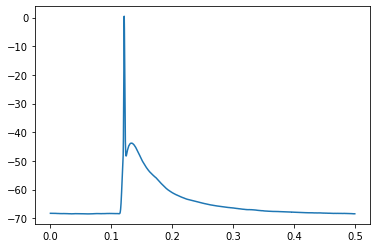

In [7]:
meansweep = np.array(opto).mean(axis = 0)
plt.plot(abf.sweepX, meansweep)


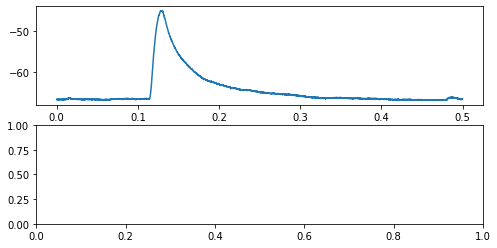

In [8]:
f, ax = plt.subplots(2,1,figsize = (8,4))
#ax[0].plot(x,y[0,:])
ax[0].plot(x,opto[0,:])

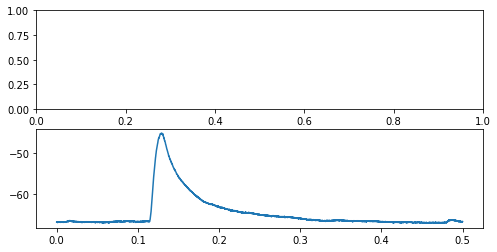

In [9]:
f, ax = plt.subplots(2,1,figsize = (8,4))
#ax[0].plot(x,y[0,:])
ax[1].plot(x,opto[0,:])

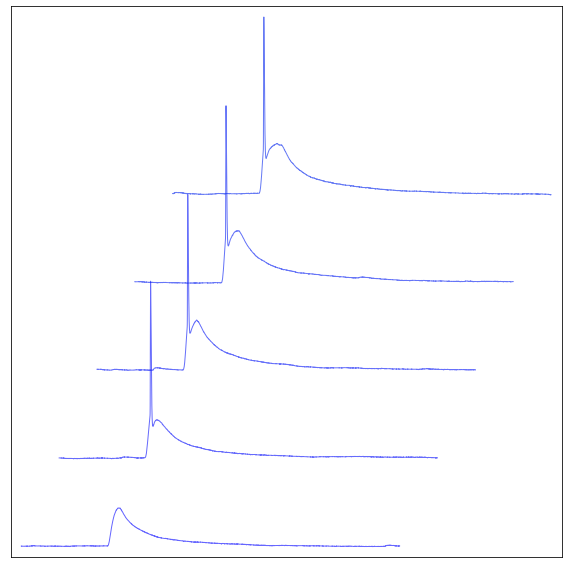

In [10]:
# use a custom colormap
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]

plt.figure(figsize=(8,8))
for sweepNumber in abf.sweepList[0:5]:
    plt.plot(
        x + .05 * sweepNumber,
        opto[sweepNumber,:] + 50*sweepNumber,
        color=colors[sweepNumber],
        lw=1, alpha=.6)
#     plt.plot(
#         abf.sweepX[i1:i2] + 0 * sweepNumber,
#         abf.sweepY[i1:i2] + 10*sweepNumber,
#         color=colors[sweepNumber],
#         lw=.5, alpha=.6)

# remove axes and use tight margins
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.gca().get_xaxis().set_visible(False)  # hide X axis
plt.margins(.02, .02)
plt.tight_layout()

plt.show()

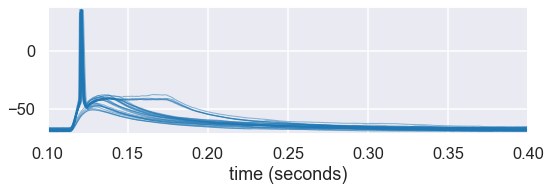

In [11]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
f, ax = plt.subplots(1,1,figsize=(8, 3), sharey = True)

file = 0
for sweepNum in abf.sweepList:
    abf.setSweep(sweepNum)
    ax.plot(abf.sweepX, abf.sweepY,
             color='C0', lw=1, alpha = 0.5)

#     ax.set_xlim([0.1078,0.1084])
# ax.set_ylim([-600,600])
plt.xlabel(abf.sweepLabelX)
plt.xlim((0.1,0.4))
plt.margins(0, .02)
plt.tight_layout()